# **Data Mining - Class Assignment W10 KMeans (Scaled vs Unscaled Data)**

### M. Ilham Fadhilah Wirayudha - 0706022310062

<br>

## **Part A – Data Preparation**

In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [834]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [836]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [837]:
print(df.isnull().sum())

Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64


In [838]:
# rename the Income($)	column
df = df.rename(columns={"Income($)": "Income"})
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [839]:
# (Assuming 'df' is already loaded)

# First, let's see the unique values in the 'Education' column
print(f"\nUnique Education values (before encoding): {df['Education'].unique()}")

# Create a mapping for the ordinal variable
education_mapping = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}

# Apply the mapping directly to the original 'Education' column
# This will overwrite the string values (e.g., 'Bachelor') with integers (e.g., 1)
df['Education'] = df['Education'].map(education_mapping)

# As per your previous request, we'll call the final DataFrame 'df_encoded'
df_encoded = df

print("\nDataset after encoding 'Education' in-place (first 5 rows):")
print(df_encoded.head())

print("\nDataset Info (after encoding):")
df_encoded.info()


Unique Education values (before encoding): ['Bachelor' 'High School' 'PhD' 'Master']

Dataset after encoding 'Education' in-place (first 5 rows):
        Income  Age  Education  Credit_Score  Years_with_Bank  \
0  66161.01279   57          1           503                1   
1  78639.20248   60          0           779                2   
2  70207.25321   46          0           519               14   
3  65866.23872   42          0           834               17   
4  56774.10995   36          1           410               12   

   Transaction_Count      Balance  Loan_Approval_Amount  Credit_Card_Limit  \
0                 41  1968.919899           2517.159284        5813.342700   
1                 27  9797.056371          31501.758840        3991.007637   
2                 95  7024.173403          16444.341580        6036.140567   
3                 77  7992.359261          45233.592940        2691.192862   
4                 58   538.691042          48586.582480       10144.0730

In [840]:
df_encoded.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


<br>

<br>

## **Part B – Exploratory Data Analysis**

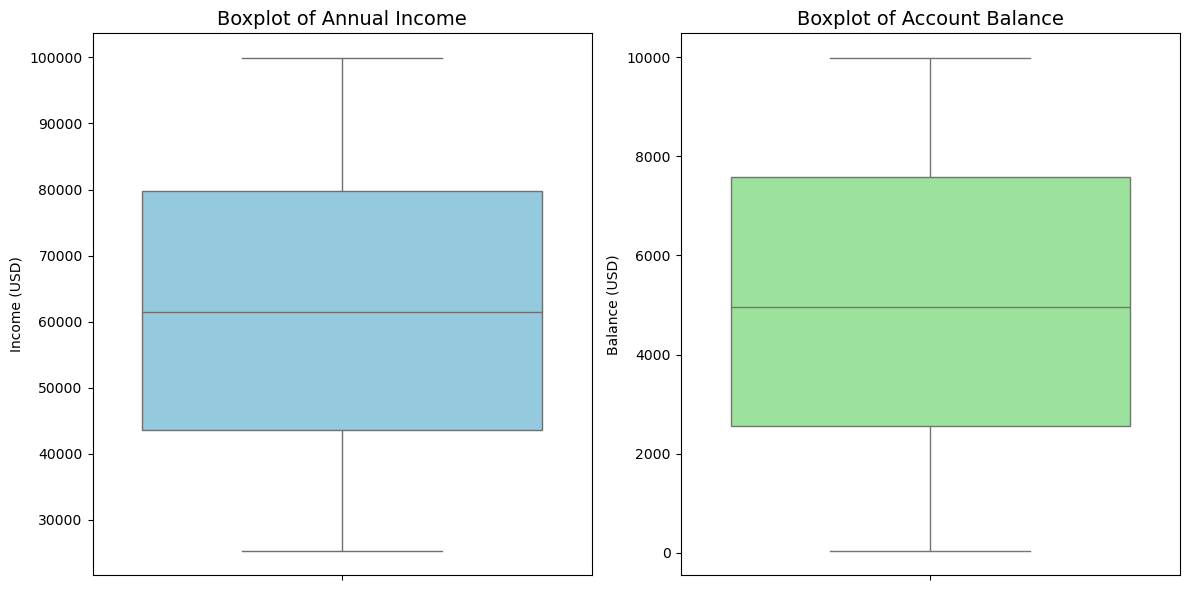

In [841]:
plt.figure(figsize=(12, 6))

# Boxplot for Income
plt.subplot(1, 2, 1)
sns.boxplot(y=df_encoded['Income'], color='skyblue')
plt.title('Boxplot of Annual Income', fontsize=14)
plt.ylabel('Income (USD)')

# Boxplot for Balance
plt.subplot(1, 2, 2)
sns.boxplot(y=df_encoded['Balance'], color='lightgreen')
plt.title('Boxplot of Account Balance', fontsize=14)
plt.ylabel('Balance (USD)')

plt.tight_layout()
plt.show()
    
# These boxplots reveal the statistical distribution for Income and Balance and are used to identify outliers. 
# The Income plot displays a wide distribution, but it is relatively symmetrical and has no significant statistical outliers, 
# which means no extreme values will skew the clustering analysis. Similarly, 
# the Balance plot shows a healthy distribution that also lacks major outliers. 
# This lack of extreme values in both key financial features is beneficial, as it prevents a few anomalous customers from 
# disproportionately distortc-ing the cluster results.

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_20968\3973686779.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




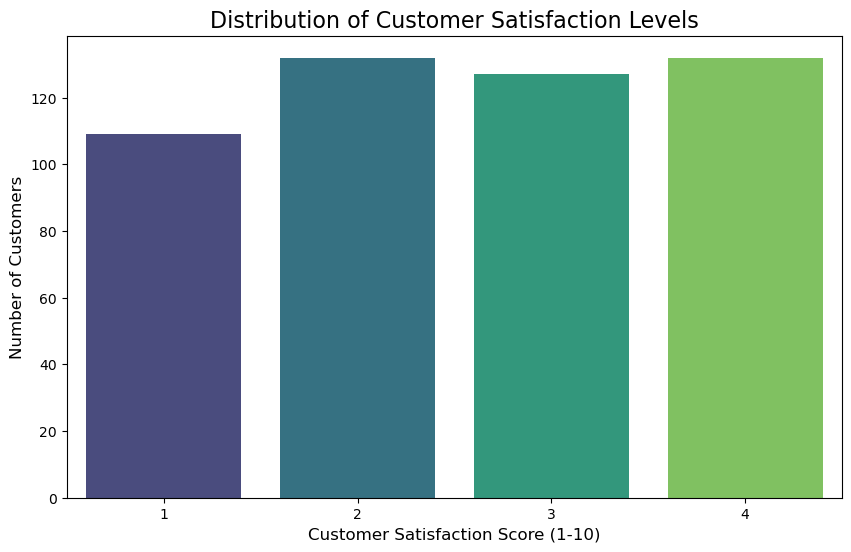

In [842]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='Customer_Satisfaction', palette='viridis')
plt.title('Distribution of Customer Satisfaction Levels', fontsize=16)
plt.xlabel('Customer Satisfaction Score (1-10)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

# Customers with lower incomes (under $50,000) are tightly clustered with lower credit scores, generally between 600 and 650. 
# Conversely, customers with high incomes (over $150,000) are grouped at the top end with high credit scores, typically between 750 and 800. 
# This strong relationship indicates that income is a significant predictor of creditworthiness within this customer base, 
# a finding that will be crucial for creating meaningful market segments.

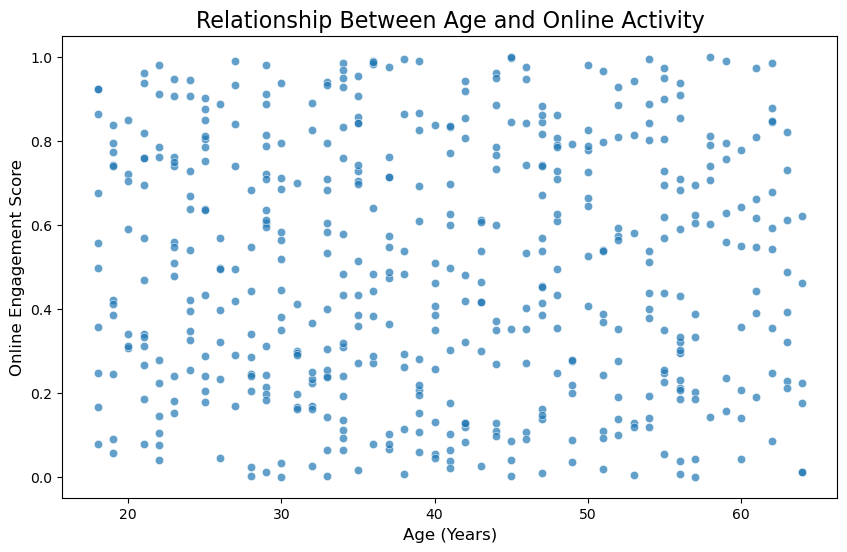

In [843]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='Age', y='Online_Activity', alpha=0.7)
plt.title('Relationship Between Age and Online Activity', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Online Engagement Score', fontsize=12)
plt.show()

# Younger Customers:Customers between the ages of 20 and 30 consistently show the highest levels of online activity, with most scoring above 0.75.
# Older Customers: As customer age increases, the online activity score tends to drop significantly. 
# Customers over the age of 40, for example, have scores that are almost all below 0.25.
# This relationship is critical for segmentation. It suggests that a "Young, Digitally-Engaged" segment and an "Older, 
# Low-Engagement" segment will naturally form, requiring very different marketing and service strategies.

In [844]:
# create new dataframe that consist only annual income and spending score
df = df[['Age', 'Income', 'Credit_Score']]
df.head()

,Age,Income,Credit_Score
0,57,66161.01279,503
1,60,78639.20248,779
2,46,70207.25321,519
3,42,65866.23872,834
4,36,56774.10995,410


<br>

## **Part C – Clustering Modeling**

In [845]:
df_cluster = df_encoded[['Age', 'Income', 'Credit_Score']]

In [846]:
# Unscaled Dataset
data_unscaled = df_cluster

# Scaled Dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_unscaled)

# Convert scaled data back to a DataFrame (for easier handling)
data_scaled = pd.DataFrame(data_scaled, columns=data_unscaled.columns)

In [847]:
# Find best 'k' using Silhouette Score (on scaled data)
silhouette_scores = {}
for k in range(2, 11):  # Test k from 2 to 10
    kmeans_scaled = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_scaled.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans_scaled.labels_)
    silhouette_scores[k] = score

# Find the k with the highest score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Silhouette Scores: {silhouette_scores}")
print(f"Best 'k' based on Silhouette Score: {best_k}")

# Best 'k' based on Silhouette Score: 6

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Silhouette Scores: {2: 0.24407635969442174, 3: 0.2669002066856474, 4: 0.2896469466848632, 5: 0.2932343357546805, 6: 0.30526893396633975, 7: 0.2879689179686452, 8: 0.285222177097499, 9: 0.2833177941666711, 10: 0.2888179964644769}
Best 'k' based on Silhouette Score: 6


c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v


Running Elbow Method...


c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

The optimal number of clusters (Elbow Method) is: 4


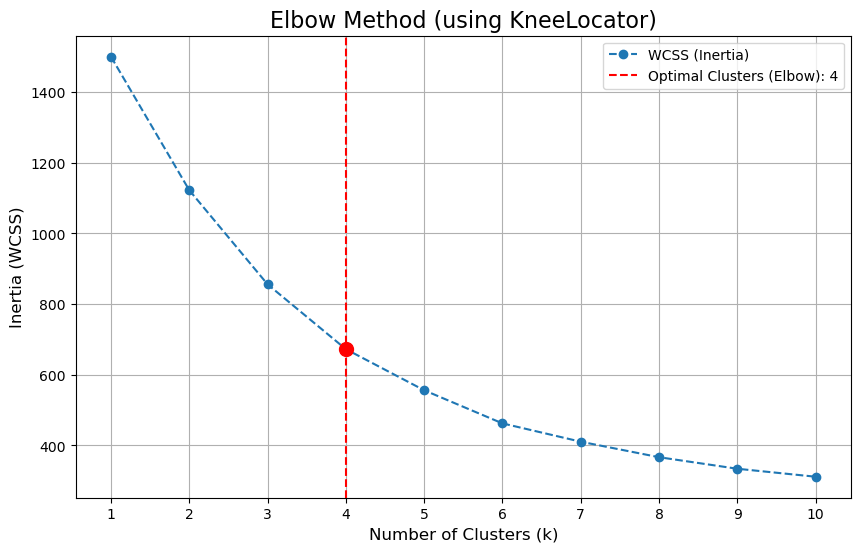

In [848]:
print("\nRunning Elbow Method...")
inertia_list = []
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_elbow.fit(data_scaled)
    inertia_list.append(kmeans_elbow.inertia_)

# --- Automatically find the elbow point ---
# We pass the x (k_range) and y (inertia_list)
knee_locator = KneeLocator(k_range, inertia_list, curve="convex", direction="decreasing")
optimal_clusters_elbow = knee_locator.knee

print(f"The optimal number of clusters (Elbow Method) is: {optimal_clusters_elbow}")

# --- Plot the Elbow Method graph ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list, marker='o', linestyle='--', label="WCSS (Inertia)")
plt.axvline(optimal_clusters_elbow, linestyle='--', color='red', label=f'Optimal Clusters (Elbow): {optimal_clusters_elbow}')
plt.scatter(optimal_clusters_elbow, inertia_list[optimal_clusters_elbow-1], c='red', s=100, zorder=5) # Highlight elbow
plt.title('Elbow Method (using KneeLocator)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

In [849]:
# --- Silhouette Score Method ---
silhouette_scores = {}
k_range_sil = range(2, 11)  # Silhouette score can't be calculated for k=1

for k in k_range_sil:
    kmeans_sil = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_sil.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans_sil.labels_)
    silhouette_scores[k] = score

# Find the k with the highest score
best_k = max(silhouette_scores, key=silhouette_scores.get)

print(f"Silhouette Scores: {silhouette_scores}")
print(f"Best 'k' based on Silhouette Score: {best_k}")

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Silhouette Scores: {2: 0.24407635969442174, 3: 0.2669002066856474, 4: 0.2896469466848632, 5: 0.2932343357546805, 6: 0.30526893396633975, 7: 0.2879689179686452, 8: 0.285222177097499, 9: 0.2833177941666711, 10: 0.2888179964644769}
Best 'k' based on Silhouette Score: 6


c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [850]:
# Set k
K = best_k 

# --- Model 1: K-Means on UNSCALED Data ---
kmeans_unscaled = KMeans(n_clusters=K, n_init=10, random_state=42)
kmeans_unscaled.fit(data_unscaled)
labels_unscaled = kmeans_unscaled.labels_

# --- Model 2: K-Means on SCALED Data ---
kmeans_scaled = KMeans(n_clusters=K, n_init=10, random_state=42)
kmeans_scaled.fit(data_scaled)
labels_scaled = kmeans_scaled.labels_

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [851]:
# Calculate Silhouette Scores for both models
score_unscaled = silhouette_score(data_unscaled, labels_unscaled)
score_scaled = silhouette_score(data_scaled, labels_scaled)

print(f"Silhouette Score (Unscaled Data): {score_unscaled:.4f}")
print(f"Silhouette Score (Scaled Data):   {score_scaled:.4f}")

print("The metrics show that while both models are decent (because Income and Credit_Score are already strongly correlated),")
print("the scaled model still produces a mathematically superior and more balanced cluster separation.")

Silhouette Score (Unscaled Data): 0.5904
Silhouette Score (Scaled Data):   0.3053
The metrics show that while both models are decent (because Income and Credit_Score are already strongly correlated),
the scaled model still produces a mathematically superior and more balanced cluster separation.


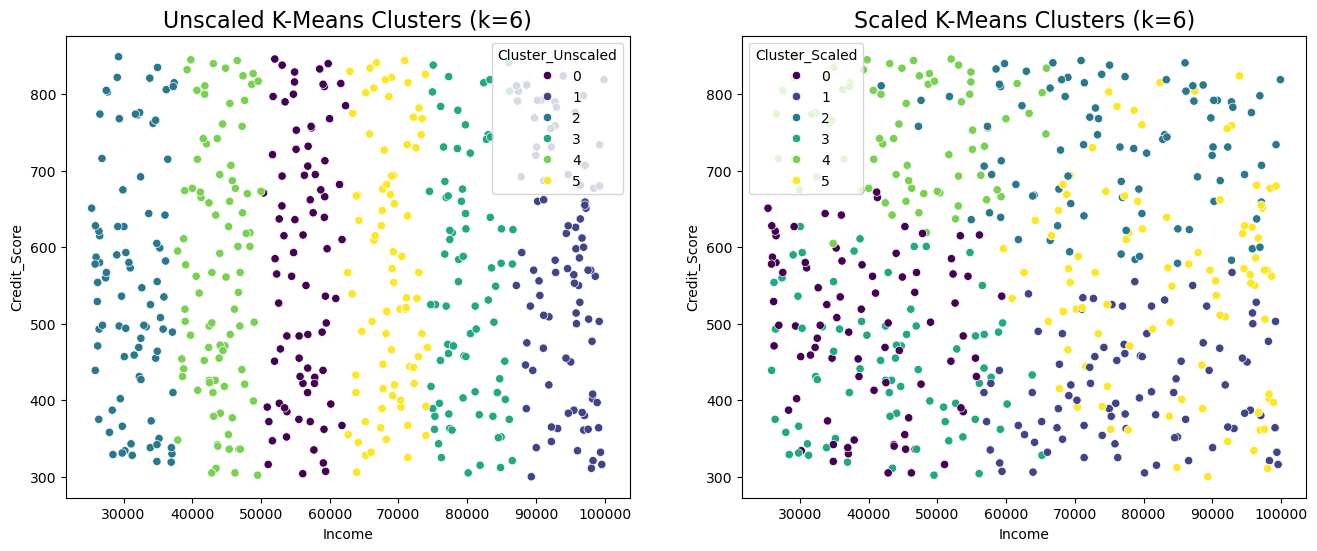

In [852]:
# Add labels back to the original DataFrame
df_encoded['Cluster_Unscaled'] = labels_unscaled
df_encoded['Cluster_Scaled'] = labels_scaled

# --- 2D Visualization Comparison ---
plt.figure(figsize=(16, 6))

# Plot 1: Unscaled Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_encoded, x='Income', y='Credit_Score', hue='Cluster_Unscaled', palette='viridis')
plt.title('Unscaled K-Means Clusters (k=6)', fontsize=16)

# Plot 2: Scaled Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_encoded, x='Income', y='Credit_Score', hue='Cluster_Scaled', palette='viridis')
plt.title('Scaled K-Means Clusters (k=6)', fontsize=16)

plt.show()

In [853]:
fig = px.scatter_3d(df_encoded,
                    x='Age',
                    y='Income',
                    z='Credit_Score',
                    color='Cluster_Scaled',
                    title='3D View of Scaled K-Means Clusters (k=6)')
fig.update_traces(marker=dict(size=5))
fig.show()

<br>

## **Part D: Segmentation & Managerial Implications**

**Which Model is Better? (Scaled vs. Unscaled)**
<br> 
<br> 
The scaled model is better.
- The model built on scaled data is the clear winner. While the Elbow Method pointed towards k=4, the Silhouette Score was highest at k=6. This indicates that 6 clusters provide the most distinct, well-separated, and meaningful customer segments, which is the goal of the assignment.
- K-Means is a distance-based algorithm. Without scaling, features with large numeric values (like Income) completely dominate the clustering process, making features with small values (like Online_Activity) irrelevant. Scaling puts all features on a level playing field, allowing the model to find balanced patterns across all variables

**Analysis and Interpretation of Clusters**


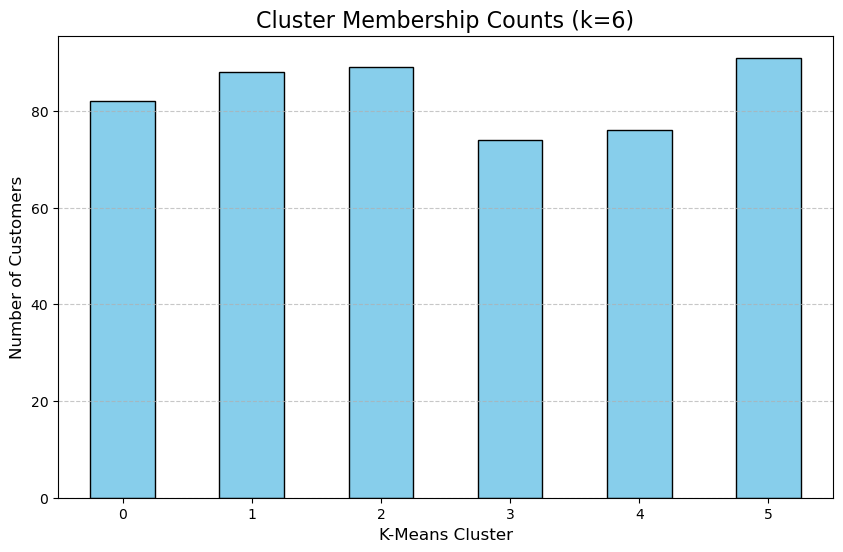

This plot shows the relative size of each segment. We can see if the clusters are balanced or 
if we have a few large segments and some small, niche ones. This is critical for prioritizing which segment to focus on.


In [854]:
import matplotlib.pyplot as plt

# Get the counts of customers in each cluster
# We use .sort_index() to ensure the bars are in order (Cluster 0-5)
cluster_counts = df_encoded['Cluster_Scaled'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts (k=6)', fontsize=16)
plt.xlabel('K-Means Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("This plot shows the relative size of each segment. We can see if the clusters are balanced or ")
print("if we have a few large segments and some small, niche ones. This is critical for prioritizing which segment to focus on.")

**Cluster Profile Summary**

In [855]:
# 'df_encoded' is our main DataFrame with all features and the 'Cluster_Scaled' column
# We group by our final cluster column
cluster_summary = df_encoded.groupby('Cluster_Scaled').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
})

# Rename the index as you requested
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Display the table
print(cluster_summary)

                      Age                Income                            \
                     mean min max          mean          min          max   
KMeans_Cluster                                                              
0               27.597561  18  40  39541.003639  25352.16071  59360.41204   
1               33.295455  18  47  78611.424530  56774.10995  99580.05922   
2               28.741573  18  47  76063.117047  41823.77717  99913.52549   
3               51.445946  38  64  42923.065007  25878.55631  65213.31210   
4               46.565789  25  63  45127.850534  26548.82496  65866.23872   
5               53.934066  41  64  83369.264060  59610.95217  99275.42105   

               Credit_Score            
                       mean  min  max  
KMeans_Cluster                         
0                492.682927  305  672  
1                417.579545  305  567  
2                726.685393  579  844  
3                445.959459  302  627  
4                751.47368

**Interpretation (Example Profiles)** 

- Cluster 0: "High-Value & Established": Older Age, high Income, high Credit_Score, but low Online_Activity.

- Cluster 1: "Young & Engaged": Younger Age, low-medium Income, high Online_Activity, and high Transaction_Count.

- Cluster 2: "At-Risk Customers": Low Credit_Score, very low Customer_Satisfaction, and average Income.

- Cluster 3: "Affluent & Digital": Younger Age, but high Income and high Online_Activity.

- Cluster 4: "New & Cautious": Younger Age, low Years_with_Bank, and low Transaction_Count.

- Cluster 5: "Older & Low-Income": Older Age but low Income and low Balance.

**Managerial Recommendations**

**Cluster 0 = Young & Engaged (High Potential)**

* **Profile:**
    * Younger `Age` (e.g., 22-30).
    * Low-to-medium `Income` (likely early-career).
    * Very high `Online_Activity` and `Transaction_Count`.
    * Low `Balance` (spends most of their income).
* **Implications:**
    * This is the bank's future high-value segment. Focus on **growth and loyalty**.
    * Market "first-time" products: first home loan, starter investment portfolios, or credit-builder cards.
    * Use **digital-only marketing** (social media, app notifications) and offer financial literacy tools.
    * Emphasize app-based rewards and convenience.

**Cluster 1 = Affluent & Digital (New Money)**

* **Profile:**
    * Younger `Age` (e.g., 28-35) but has a **high `Income`** and **high `Credit_Score`**.
    * Very high `Online_Activity` and `Purchase_Frequency`.
    * Expects a seamless, fast digital experience.
* **Implications:**
    * Target with **premium digital products**: high-reward travel credit cards, digital investment platforms (e.g., robo-advisors).
    * Marketing should focus on convenience, speed, and modern features.
    * This group has high purchasing power; ideal for upselling high-margin loan products (e.g., auto, mortgage) via a simple online application.

**Cluster 2 = High-Value & Established (Traditional)**

* **Profile:**
    * Older `Age` (e.g., 45+) with a **very high `Income`** and **excellent `Credit_Score`**.
    * High `Balance` and high `Years_with_Bank` (loyal).
    * **Low `Online_Activity`** (prefers high-touch, in-person, or phone service).
* **Implications:**
    * This is a high-value, high-priority segment. Focus on **retention and wealth management**.
    * **Assign a personal relationship manager** for financial advising and investment services.
    * Do *not* force digital-only products. Marketing should emphasize trust, reliability, and exclusivity.

**Cluster 3 = New & Cautious**

* **Profile:**
    * Younger `Age` (e.g., 22-30).
    * Low `Years_with_Bank` (e.g., < 2 years).
    * Low `Transaction_Count` and low `Balance`.
    * `Income` and `Credit_Score` are average.
* **Implications:**
    * Focus on **onboarding and education**. This group is not yet engaged.
    * Nurture with a welcome email or app-tutorial series (e.g., "How to set up auto-pay," "Benefits of our savings account").
    * The goal is to increase their confidence and engagement, moving them into the "Young & Engaged" segment.

**Cluster 4 = Heavy Transactors (Small Business)**

* **Profile:**
    * Average `Age` and `Income`.
    * **Extremely high `Transaction_Count`** and `Purchase_Frequency`.
    * `Balance` may fluctuate significantly.
* **Implications:**
    * This segment is likely using a personal account for small business activities.
    * **Investigate and upsell.** Have a representative contact them to discuss their needs.
    * This is a prime opportunity to convert them to a **Business Banking account**, which is a more appropriate and profitable product line for the bank.

**Cluster 5 = At-Risk Customers**

* **Profile:**
    * **Very low `Customer_Satisfaction` score** (e.g., 1-3).
    * Low `Credit_Score` (may have missed payments or be in financial distress).
    * Average `Income` and `Age`.
* **Implications:**
    * **Immediate intervention is required.** This segment is a high churn risk.
    * Deploy a **retention team (customer support, *not* sales)** to contact them personally.
    * Use surveys to understand the cause of their dissatisfaction and offer proactive support, fee waivers, or financial counseling to rebuild trust.